In [ ]:
#importing libraries
import librosa
import librosa.display
import tensorflow as tf
print(tf.__version__)
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
import sys
from IPython.display import Audio

2.2.0


In [ ]:
import IPython.display as ipd

Step-1: Download the dataset

In [ ]:
#download dataset
#The wget command is a command line utility for downloading files from the Internet.
#It supports downloading multiple files, downloading in the background, resuming downloads, limiting the bandwidth used for downloads and viewing headers.

!wget http://www.openslr.org/resources/12/dev-clean.tar.gz

--2020-06-16 09:29:51--  http://www.openslr.org/resources/12/dev-clean.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337926286 (322M) [application/x-gzip]
Saving to: ‘dev-clean.tar.gz.1’

dev-clean.tar.gz.1  100%[===================>] 322.27M  4.23MB/s    in 1m 46s  

2020-06-16 09:31:37 (3.05 MB/s) - ‘dev-clean.tar.gz.1’ saved [337926286/337926286]



In [ ]:
#could have also mounted the google drive and accesed the dataset when uploaded on drive mounted
#from google.colab import drive
#drive.mount("/content/gdrive")

In [ ]:
#unzip file
import os
os.mkdir("/tmp/data/")
!tar -xf dev-clean.tar.gz -C /tmp/data


Step-2:  Analysing the directory

In [ ]:
os.listdir('/tmp/data')

['LibriSpeech']

In [ ]:
os.listdir('/tmp/data/LibriSpeech')

['LICENSE.TXT',
 'SPEAKERS.TXT',
 'BOOKS.TXT',
 'README.TXT',
 'CHAPTERS.TXT',
 'dev-clean']

In [ ]:
#os.listdir('/tmp/data/LibriSpeech/README.TXT')
f = open('/tmp/data/LibriSpeech/README.TXT')
print(f.read())

1. General information

LibriSpeech is a corpus of read speech, based on LibriVox's public domain
audio books. Its purpose is to enable the training and testing of automatic
speech recognition(ASR) systems. 


2. Structure

The corpus is split into several parts to enable users to selectively download
subsets of it, according to their needs. The subsets with "clean" in their name
are supposedly "cleaner"(at least on average), than the rest of the audio and
US English accented. That classification was obtained using very crude automated 
means, and should not be considered completely reliable. The subsets are
disjoint, i.e. the audio of each speaker is assigned to exactly one subset.

The parts of the corpus are as follows:

* dev-clean, test-clean - development and test set containing "clean" speech.
* train-clean-100 - training set, of approximately 100 hours of "clean" speech
* train-clean-360 - training set, of approximately 360 hours of "clean" speech
* dev-other, test-other - deve

In [ ]:
os.listdir('/tmp/data/LibriSpeech/dev-clean')

['1988',
 '7976',
 '6295',
 '422',
 '5694',
 '3536',
 '3576',
 '3853',
 '6345',
 '8842',
 '2277',
 '5338',
 '2803',
 '3752',
 '6241',
 '2412',
 '652',
 '1462',
 '1673',
 '2428',
 '3081',
 '3000',
 '7850',
 '174',
 '1993',
 '2902',
 '2035',
 '84',
 '5895',
 '251',
 '3170',
 '1272',
 '6313',
 '1919',
 '2086',
 '6319',
 '2078',
 '8297',
 '777',
 '5536']

In [ ]:
os.listdir('/tmp/data/LibriSpeech/dev-clean/2277')

['149896', '149874', '149897']

In [ ]:
os.listdir('/tmp/data/LibriSpeech/dev-clean/2277/149896')

['2277-149896-0005.flac',
 '2277-149896-0023.flac',
 '2277-149896-0013.flac',
 '2277-149896-0014.flac',
 '2277-149896.trans.txt',
 '2277-149896-0031.flac',
 '2277-149896-0021.flac',
 '2277-149896-0009.flac',
 '2277-149896-0029.flac',
 '2277-149896-0008.flac',
 '2277-149896-0016.flac',
 '2277-149896-0002.flac',
 '2277-149896-0003.flac',
 '2277-149896-0017.flac',
 '2277-149896-0027.flac',
 '2277-149896-0024.flac',
 '2277-149896-0030.flac',
 '2277-149896-0012.flac',
 '2277-149896-0034.flac',
 '2277-149896-0022.flac',
 '2277-149896-0020.flac',
 '2277-149896-0026.flac',
 '2277-149896-0004.flac',
 '2277-149896-0032.flac',
 '2277-149896-0001.flac',
 '2277-149896-0033.flac',
 '2277-149896-0011.flac',
 '2277-149896-0025.flac',
 '2277-149896-0018.flac',
 '2277-149896-0028.flac',
 '2277-149896-0019.flac',
 '2277-149896-0006.flac',
 '2277-149896-0007.flac',
 '2277-149896-0010.flac',
 '2277-149896-0000.flac',
 '2277-149896-0015.flac']

In [ ]:
file = open('/tmp/data/LibriSpeech/dev-clean/2277/149896/2277-149896.trans.txt','r')
print(file.read())
#transcripts 

2277-149896-0000 HE WAS IN A FEVERED STATE OF MIND OWING TO THE BLIGHT HIS WIFE'S ACTION THREATENED TO CAST UPON HIS ENTIRE FUTURE
2277-149896-0001 HE WOULD HAVE TO PAY HER THE MONEY WHICH SHE WOULD NOW REGULARLY DEMAND OR THERE WOULD BE TROUBLE IT DID NOT MATTER WHAT HE DID
2277-149896-0002 HURSTWOOD WALKED THE FLOOR MENTALLY ARRANGING THE CHIEF POINTS OF HIS SITUATION
2277-149896-0003 HE ALSO THOUGHT OF HIS MANAGERIAL POSITION
2277-149896-0004 HOW WOULD THE PAPERS TALK ABOUT IT
2277-149896-0005 MANY LITTLE WRINKLES GATHERED BETWEEN HIS EYES AS HE CONTEMPLATED THIS AND HIS BROW MOISTENED
2277-149896-0006 HE COULD ARRANGE THAT SATISFACTORILY FOR CARRIE WOULD BE GLAD TO WAIT IF NECESSARY
2277-149896-0007 HE WOULD SEE HOW THINGS TURNED OUT TO MORROW AND THEN HE WOULD TALK TO HER THEY WERE GOING TO MEET AS USUAL
2277-149896-0008 FOR SOME REASON HE FELT AS IF SOMETHING MIGHT COME THAT WAY AND WAS RELIEVED WHEN ALL THE ENVELOPES HAD BEEN SCANNED AND NOTHING SUSPICIOUS NOTICED
2277-149896-00

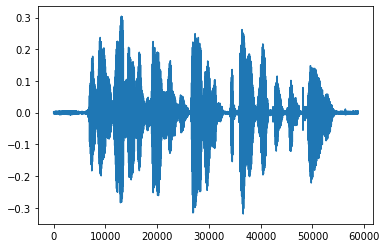

In [ ]:

x, sr = librosa.load('/tmp/data/LibriSpeech/dev-clean/2277/149896//2277-149896-0015.flac', sr = 16000)
plt.plot(x)
#plotting the .flac file


<class 'numpy.ndarray'> <class 'int'>
(58800,) 16000


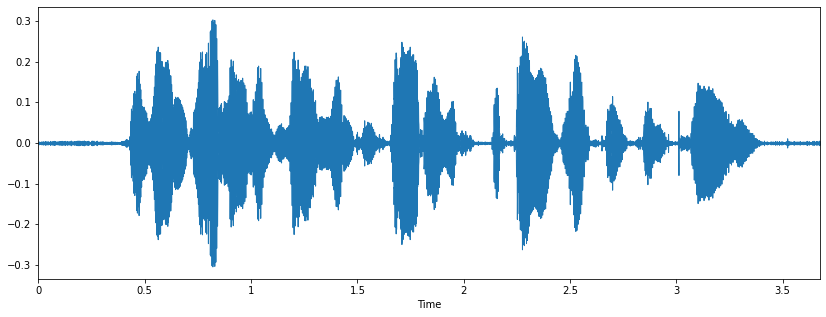

In [ ]:
#print(type(x), type(sr))
#print(x.shape, sr)

#plt.figure(figsize=(14, 5))
#librosa.display.waveplot(x, sr=sr)

In [ ]:
duration = len(x)/sr
duration

3.675

In [ ]:
audio_fpath = "/tmp/data/LibriSpeech/dev-clean/2277/149896//2277-149896-0015.flac"
Audio(audio_fpath)

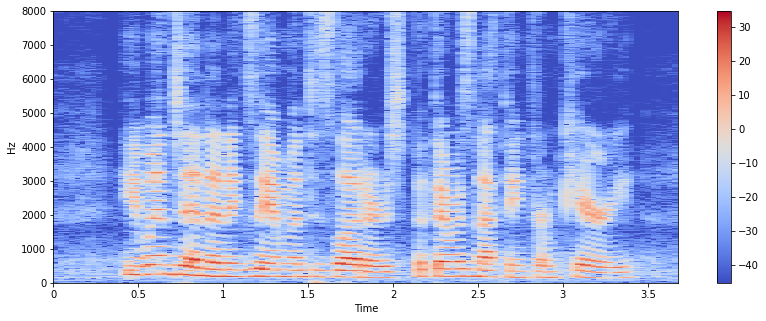

In [ ]:
#X = librosa.stft(x)
#Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#plt.colorbar()

In [ ]:
!pip install pydub  

In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install PyAudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 43 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 2s (104 kB/s)
Select

In [ ]:
from pydub import AudioSegment
from pydub.utils import make_chunks
from pyaudio import PyAudio
from threading import Thread


class Song(Thread):

    def __init__(self, f, *args, **kwargs):
        self.seg = AudioSegment.from_file(f)
        self.__is_paused = True
        self.p = PyAudio()
        print (self.seg.frame_rate)
        Thread.__init__(self, *args, **kwargs)
        self.start()

    def pause(self):
        self.__is_paused = True

    def play(self):
        self.__is_paused = False

    def __get_stream(self):
        return self.p.open(format=self.p.get_format_from_width(self.seg.sample_width),
                           channels=self.seg.channels,
                           rate=self.seg.frame_rate,
                           output=True)

    def run(self):
        stream = self.__get_stream()
        chunk_count = 0
        chunks = make_chunks(self.seg, 100)
        while chunk_count <= len(chunks):
            if not self.__is_paused:
                data = (chunks[chunk_count])._data
                chunk_count += 1
            else:
                free = stream.get_write_available()
                data = chr(0)*free
            stream.write(data)

        stream.stop_stream()
        self.p.terminate()

song = Song("/tmp/data/LibriSpeech/dev-clean/2277/149896//2277-149896-0015.flac")
song.play()

16000


Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "<ipython-input-39-5c321bccc74a>", line 30, in run
    stream = self.__get_stream()
  File "<ipython-input-39-5c321bccc74a>", line 27, in __get_stream
    output=True)
  File "/usr/local/lib/python3.6/dist-packages/pyaudio.py", line 750, in open
    stream = Stream(self, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pyaudio.py", line 441, in __init__
    self._stream = pa.open(**arguments)
OSError: [Errno -9996] Invalid output device (no default output device)



In [ ]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

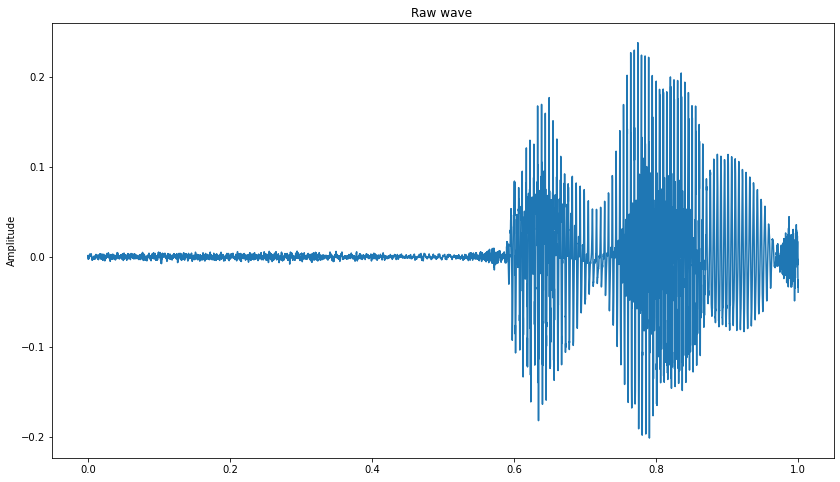

In [ ]:
#data = load_audio_file(audio_fpath)
#plot_time_series(data)

In [ ]:
#Hear it ! 
#ipd.Audio(data, rate=16000)

In [ ]:
"""dev-clean has sub-directories which further have sub-directories 
   within which are stored .flac file and transcripts for the same.

   In the code below we try to access each of the transcripts and their .flac 
   files by running nested loops. We keep appending this data to make
   a list"""
def datadevclean():
  data = []
  for i in os.listdir('/tmp/data/LibriSpeech/dev-clean'):
    for j in os.listdir('/tmp/data/LibriSpeech/dev-clean/'+ i):
      for k in os.listdir('/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j):
        if k.endswith('trans.txt'):
          
          """we open each transcript and store the lines(as trans) and the 
            corresponding .flac file (as audiofile) of that line
            then we append it"""

          transfile = '/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j + '/' + k
          with open(transfile, "r") as file:
            for line in file:
              posofspace = line.find(' ',0,20)
              if (posofspace != -1):
                trans = line[(posofspace+1):]
                audiofile = '/tmp/data/LibriSpeech/dev-clean/' + i + '/' + j + '/' + line[:posofspace] + '.flac'
                sample = (audiofile, trans)  
                data.append (sample)
          file.closed
  return data
  

In [ ]:
def noise(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

def shift(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif self.shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift    

    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data

def pitch(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


def speed(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)

def to_spectrogram(audio_file):
    # Loads the audio file and returns the spectrogram
    x, sr = librosa.load(audio_file, sr = 44100)
    X = librosa.stft(x)
    spectrogram = librosa.amplitude_to_db(abs(X))
    return spectrogram

def show_spectrogram(spectrogram, sr = 44100):
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [ ]:
def clean_label(_str):
        _str = _str.strip()
        _str = _str.lower()
        _str = _str.replace(".", "")
        _str = _str.replace(",", "")
        _str = _str.replace("?", "")
        _str = _str.replace("!", "")
        _str = _str.replace(":", "")
        _str = _str.replace("-", " ")
        _str = _str.replace("_", " ")
        _str = _str.replace("  ", " ")
        return _str

In [ ]:
token_to_index={'<pad>': 0,
                'a': 1,
                'b': 2,
                'c': 3,
                'd': 4,
                'e': 5,
                'f': 6,
                'g': 7,
                'h': 8,
                'i': 9,
                'j': 10,
                'k': 11,
                'l': 12,
                'm': 13,
                'n': 14,
                'o': 15,
                'p': 16,
                'q': 17,
                'r': 18,
                's': 19,
                't': 20,
                'u': 21,
                'v': 22,
                'w': 23,
                'x': 24,
                'y': 25,
                'z': 26,
                ' ': 27,
                '\'': 28
                }

In [ ]:
def spectrogram_features(samples, samplerate, stridems=10.0,windowms=20.0, freqmax=None, eps=1e-14):
  """Compute the spectrograms for the input samples(waveforms)."""
  
  # samplerate == number of times a signal is read in a second ,(eg n, then the signal is sampled every 1/n seconds)
  # windowms is the number of samples(window duration) in ms

  # samplerate/2 is the Nyquist frequency
  if freqmax is None:
    freqmax = samplerate / 2

  # raising exception when maximum freq is above Nyquist frequency  
  if freqmax > samplerate / 2:
    raise ValueError("freqmax must not be greater than half of sample rate.")

  if stridems > windowms:
    raise ValueError("Stride size must not be greater than window size.")

  # stride_size is the frame (window) overlap amplitudes (frequency bins)
  # each window is going to have window_size amplitudes
  stride_size = int(0.001 * samplerate * stridems)
  window_size = int(0.001 * samplerate * windowms)

  # Extract strided windows
  truncate_size = (len(samples) - window_size) % stride_size
  samples = samples[:len(samples) - truncate_size]
  nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
  nstrides = (samples.strides[0], samples.strides[0] * stride_size)
  windows = np.lib.stride_tricks.as_strided(
      samples, shape=nshape, strides=nstrides)
  assert np.all(
      windows[:, 1] == samples[stride_size:(stride_size + window_size)])

  # Window weighting, squared Fast Fourier Transform (fft), scaling
  # Weighting window is used here to handle discontinuity of this small signal
  weighting = np.hanning(window_size)[:, None]
  fft = np.fft.rfft(windows * weighting, axis=0)
  fft = np.absolute(fft)
  fft = fft**2
  scale = np.sum(weighting**2) * samplerate
  fft[1:-1, :] *= (2.0 / scale)
  fft[(0, -1), :] /= scale
  # Prepare fft frequency list
  freqs = float(samplerate) / window_size * np.arange(fft.shape[0])

  # Compute spectrogram feature
  ind = np.where(freqs <= freqmax)[0][-1] + 1
  specgram = np.log(fft[:ind, :] + eps)
  return np.transpose(specgram, (1, 0))

In [ ]:
def label_feature(text, token_to_index):
  """Convert string to a list of integers."""

  # removing all the leading and trailing spaces from a string and then converting into lowercase and making a list of it
  tokens = list(text.strip().lower())
  features = [token_to_index[token] for token in tokens]
  return features

In [ ]:
import numpy as np
import keras
import librosa
import __future__
import os
!pip install pysoundfile
import tensorflow as tf
import soundfile as sf 
from matplotlib import pyplot as plt

In [ ]:
data = datadevclean()
traindata = data[:2500]
validdata = data[2500:]
len((data))
#len(traindata)

2703

In [ ]:

class DataGenerator (keras.utils.Sequence):

  def __init__(self, batch_size = 32, shuffle=True, dim = (1874,161)):
    # Constructor for the class assigning ivalues to object properties
    self.batch_size = batch_size
    # self.data = data
    self.data = datadevclean()
    self.list_IDs = np.arange(len(data))
    self.shuffle = shuffle
    self.on_epoch_end()
    self.dim = dim

  def __len__ (self):  
    # Returns number of batches per epoch
    #print int (np.floor (len (self.list_IDs) / self.batch_size))
    return int (np.floor (len (self.list_IDs) / self.batch_size))
 
  def __getitem__ (self, index):
    # Return 1 batch of data

    # 'Generate indexes of the batch'
    indexes = self.indexes [index*self.batch_size:(index+1)*self.batch_size]
    print (indexes)

    # 'Find list of IDs'
    list_IDs_temp = [self.list_IDs[k] for k in indexes]
    # print (list_IDs_temp)

    # 'Generate data'
    X, y = self.__data_generation (list_IDs_temp)

    return X, y

  def on_epoch_end (self):
    # Updates indexes or shuffle them after each epoch
    self.indexes = np.arange (len (self.list_IDs))
    if self.shuffle == True:
      np.random.shuffle (self.indexes)

  def __data_generation (self, list_IDs_temp):
    # Generates data containing batch_size samples
    X = np.empty((self.batch_size, *self.dim))
    Y = np.empty((self.batch_size), dtype =list)
    for i, ID in enumerate(list_IDs_temp):

      audiofilepath, transcript = data[i]
      audio, samplerate = sf.read(audiofilepath)
      linetoidx = label_feature(transcript, token_to_index)
      
      if len(audio)>300000:
            audio = audio[:300000]
      else:
            audio = np.pad(audio, (0, max(0, 300000 - len(audio))), "constant")
      x = spectrogram_features(audio, samplerate, stridems=10.0,
                                windowms=20.0, freqmax=None, eps=1e-14)
      if len(linetoidx) > 500:
        linetoidx = linetoidx[:500]
      else:
        linetoidx = np.pad(linetoidx, (0, max(0, 500 - len(linetoidx))), "constant")
  
      X[i,]=x
      Y[i]=list(linetoidx)
    return X, Y

84
[-20.63886816 -20.39182357 -21.55280368 -21.17948042 -21.85295382
 -22.4625922  -23.89560494 -22.71977008 -21.56271761 -22.02017964
 -22.8500594  -25.27157446 -23.04753549 -26.45406582 -24.84693215
 -24.09864573 -23.17448598 -23.59755461 -23.86622245 -25.73168658
 -24.41133002 -25.55254828 -23.83334528 -22.66254163 -23.41455656
 -23.88823296 -23.90897818 -24.56949456 -26.31324751 -25.81907936
 -26.55412349 -24.20212565 -25.32766635 -25.41827231 -25.62517928
 -28.29070653 -29.75723862 -26.97218973 -27.36049154 -26.44375208
 -27.0988914  -27.478356   -26.99209088 -27.40226798 -25.17990829
 -25.41753049 -26.77339297 -27.85784718 -27.45142925 -26.82696436
 -27.89045343 -26.19511722 -24.68694087 -25.13867317 -29.67422941
 -26.54801391 -26.05737785 -26.92752396 -28.48350569 -26.5666094
 -26.71270069 -27.29269454 -27.00098779 -29.36947281 -27.68510187
 -28.84191716 -27.78413543 -30.05425169 -26.86964844 -26.24477265
 -29.23813227 -26.35862336 -28.01007835 -27.08440546 -26.95410912
 -28.650

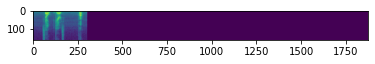

In [ ]:
train = DataGenerator()
print(len(train))
x, y =train.__getitem__(10)
print(x[10][1])
print(x[10])
print(len(x[10]))
print(y[10])
print(len(y[10]))
plt.imshow(np.transpose(x[10]))